<a href="https://colab.research.google.com/github/PervejHosen/Learning-Python/blob/main/Class_08_(ML_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Related Problem**
[**When the Target Variable is Numerical**]

# **Working with Categorical Predictors**

***Connencting with drive***

In [1]:
# Connecting with Google Drive where the data is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Neccessary Libraries**

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Problem Identification:**
* Let's Predict the Price of a Car from some of it's associated factors, like
    * who is the maker,
    * which colour,
    * Seat & Door Size etc.

# **Loading & Reading Datasets**

In [3]:
# Reading the csv data from the specific Google Drive
car_sales = pd.read_csv("/content/drive/MyDrive/Python/Datasets/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [ ]:
# Looking at the shape of the dataset and types of the variable
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
# Inspecting the Variable Types
car_sales.dtypes

# Doors is a int (numerical); But, it shouldn't

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

***Doors is a int (numerical); But, it shouldn't***

# **Summary Statistics**

In [ ]:
# Let's check the Descriptive Statistics of the Numerical Variables
car_sales.describe()

,Odometer (KM),Doors,Price
count,1000.000000,1000.000000,1000.000000
mean,131073.708000,4.014000,16045.665000
std,68859.723885,0.379405,8630.794219
min,10148.000000,3.000000,2796.000000
25%,71238.000000,4.000000,9481.500000
50%,131202.000000,4.000000,14264.000000
75%,192372.750000,4.000000,20738.750000
max,249860.000000,5.000000,52458.000000


In [ ]:
car_sales["Doors"].unique()

array([4, 5, 3])

In [ ]:
# Is "Doors" really a Numerical variable or Categorical?
# Let's check it's Frequency Distribution
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [ ]:
# Check another Categorical Variable's Frequency Distribution
# Numerical Variables will have many category values; Not like this
car_sales["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [ ]:
# Frequency Distribution of Colour
car_sales["Colour"].value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [ ]:
# Let's convert "Doors" into Categorical (object) from Numerical (int64)
car_sales["Doors"] = car_sales["Doors"].astype(object)

In [ ]:
# Chect whether this worked or not?
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors            object
Price             int64
dtype: object

# **Splitting the Data**

In [ ]:
# Split into X-y
# For now, let's try with the categorical features; We'll work on it later
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

# **ML Process**

In [ ]:
# Build Machine Learning Model
from sklearn.ensemble import RandomForestRegressor

# We're considering a Regression based model of Random Forest this term
model = RandomForestRegressor()

model.fit(X_train, y_train)

# This will through Error as ML Models usually aren't capable of working with String
# The Error we will get: " ValueError: could not convert string to float: 'Honda' "

ValueError: ignored

* This will through Error as ML Models usually aren't capable of working with String
* The Error we will get: " ValueError: could not convert string to float: 'Honda' " *italicized text*

# **Feature Engineering**

In [ ]:
# Let's look at the features once again:

X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [ ]:
# From the features datatypes we can see that only "Odometer (KM)" is numerical
X.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors            object
dtype: object

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
# As we don't understand anything about the Array Output, let's convert this to a Pandas Dataframe
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
transformed_X.head()
# This means that "transformed_X" is still a n-dimensional array.
# In the above cell we just printed that in Pandas Dataframe format

AttributeError: ignored

In [ ]:
# Another way to do it with pandas "dummies" function
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

<ipython-input-139-f01853de67df>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])


,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0
996,0,0,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,1,0,0,0,0,1,0
998,0,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
X.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors'], dtype='object')

In [ ]:
X_Odo = X["Odometer (KM)"]
X_Odo.head()

0     35431
1    192714
2     84714
3    154365
4    181577
Name: Odometer (KM), dtype: int64

In [ ]:
X_dum= dummies.join(X_Odo, how='inner')
X_dum

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5,Odometer (KM)
0,0,1,0,0,0,0,0,0,1,0,1,0,35431
1,1,0,0,0,0,1,0,0,0,0,0,1,192714
2,0,1,0,0,0,0,0,0,1,0,1,0,84714
3,0,0,0,1,0,0,0,0,1,0,1,0,154365
4,0,0,1,0,0,1,0,0,0,1,0,0,181577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0,35820
996,0,0,1,0,0,0,0,0,1,1,0,0,155144
997,0,0,1,0,0,1,0,0,0,0,1,0,66604
998,0,1,0,0,0,0,0,0,1,0,1,0,215883


# **Train-Test Split**

In [ ]:
# Let's Split train-test data again with the transformed data

# To keep the split, hence result consistent, pick a random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(800, 13)
(800,)
(200, 13)
(200,)


In [ ]:
# Let's Split train-test data again with the transformed data

# To keep the split, hence result consistent, pick a random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_dum,
                                                    y,
                                                    test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(800, 13)
(800,)
(200, 13)
(200,)


# **Model Fitting**

In [ ]:
# Let's refit the model
model.fit(X_train, y_train);

In [ ]:
# Check the Model Score [Default for Regressed-based model is- R-square (R^2)]
R2 = model.score(X_test, y_test)
R2
# The value of R-square is between 0-1. Higher the better.
# It explains the amount of variation in the target variable that is caused by the features considered in the model.

0.3235867221569877

**Interpretations:**
* Pretty low, right?
* But, it's supposed to be.
* With only this features, we cannot expect more.
* There are many other factors that influnce the price of a car.

In [ ]:
# Let's checkout the predicted values of the car price (target)
y_preds = model.predict(X_test)
y_preds

array([11980.62, 11307.62, 49109.74, 23131.71, 29249.8 , 11833.24,
       11638.86, 16208.56, 13834.75,  8762.22, 28612.51, 17136.84,
       29430.4 , 10127.63, 18598.58, 15717.94, 11873.78, 13191.54,
       26231.07, 14252.52, 29249.8 ,  9876.29, 14991.7 , 11234.77,
       22902.12, 28719.76, 11154.72, 16398.74, 28765.07, 19651.09,
       17401.53, 12578.7 , 11401.2 , 17354.79, 12338.76,  8617.83,
       10244.67, 30861.39, 13254.76,  9750.21, 17267.52, 23039.71,
       24020.7 , 11487.21, 13519.94, 24436.07,  9976.91, 11656.77,
       24477.1 , 12137.94, 11866.05,  9069.52, 18875.15, 10620.03,
        8897.53, 21112.96,  6813.93,  9280.16,  8506.86, 20835.51,
       10682.64, 11146.14, 31296.82, 14915.92, 19896.97, 15920.3 ,
       11404.55, 23600.22, 15238.56, 12302.97, 10044.7 , 15888.36,
       14943.17, 16253.78,  9518.03, 12519.84, 18572.98, 10449.83,
       12522.05, 14313.87,  8939.03, 10494.97, 10510.64, 29353.22,
       25334.37, 18248.66,  5626.42, 11784.4 , 28749.04, 28000

In [ ]:
# Let's checkout the actual values of the car price (target)
y_test

521    13707
737    12650
740    19500
660    26880
411    41294
       ...  
408    10855
332     6460
208    33077
613     8164
78      6502
Name: Price, Length: 200, dtype: int64

## **Evaluation:**
* We can compare these two arrays and find out how much out prediction is deviating from the true case.
* We can do this manually or we can simply use Mean Squared Error (MSE) or Mean Absolute Error (MAE)
* Less is Better when we're comparing different models.
* A model's mean absolute error can be calculated with Scikit-Learn's `mean_absolute_error()` function.
* A model's mean squared error can be calculated with Scikit-Learn's `mean_squared_error()` function.

**Mean Absolute Error**

In [ ]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 6012.4608


**Interpretation:**
* MAE gives a better indication of how far off each of your model's predictions are on average.

**Mean Squared Error**

In [ ]:
#mean_squared_error() function.
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 61830483.959232


**Interpretation:**
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences.
* Huge values, right?
* That's because our model isn't a good fit, which we found out from the R^2 value.

**Root Mean Squared Error**

In [ ]:
# Root Mean Squared Error
rmse = mean_squared_error(y_test, y_preds, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 7863.236226849096


# **Visualization Difference**

**Let's make it a little more visual to understand the difference between the actual vs predicted value**

In [ ]:
#difference between the actual vs predicted value

df = pd.DataFrame(data={"Actual Car Price": y_test,
                        "Predicted Car Price": y_preds})
df

,Actual Car Price,Predicted Car Price
521,13707,11980.62
737,12650,11307.62
740,19500,49109.74
660,26880,23131.71
411,41294,29249.80
...,...,...
408,10855,11540.49
332,6460,11445.84
208,33077,30223.27
613,8164,24396.76


**Visualizations with plots**

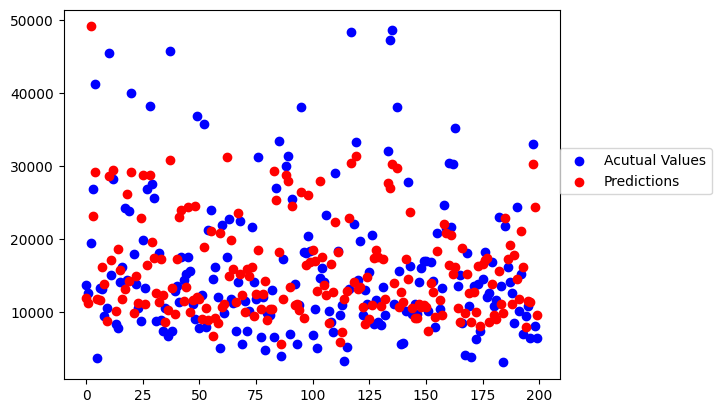

In [ ]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["Actual Car Price"], c='b', label="Acutual Values")
ax.scatter(x, df["Predicted Car Price"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

**Another way**

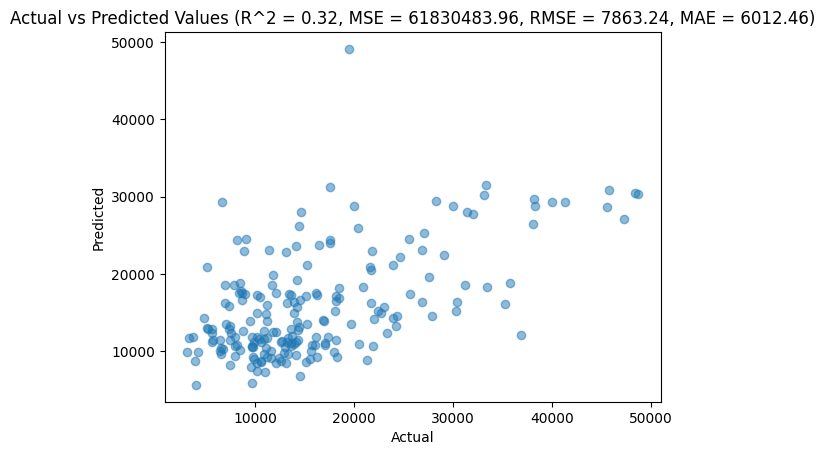

In [ ]:
# Another Way:
plt.scatter(df["Actual Car Price"], df["Predicted Car Price"], alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values (R^2 = {:.2f}, MSE = {:.2f}, RMSE = {:.2f}, MAE = {:.2f})".format(R2, mse, rmse, mae))
plt.show()

In [ ]:
# Identifying the Most Influencial Features
feature_importance = model.feature_importances_
feature_importance

array([0.13661009, 0.01501809, 0.01446745, 0.02670849, 0.01756157,
       0.02752121, 0.01347286, 0.01939707, 0.02605592, 0.00740437,
       0.00437011, 0.0067569 , 0.68465587])

In [ ]:
#np.sort(feature_importance)[::-1]
feature_importance[sorted_indices]

array([0.68465587, 0.13661009, 0.02752121, 0.02670849, 0.02605592,
       0.01939707, 0.01756157, 0.01501809, 0.01446745, 0.01347286,
       0.00740437, 0.0067569 , 0.00437011])

In [ ]:
# Get feature names
feature_names = X_dum.columns
feature_names

Index(['Make_BMW', 'Make_Honda', 'Make_Nissan', 'Make_Toyota', 'Colour_Black',
       'Colour_Blue', 'Colour_Green', 'Colour_Red', 'Colour_White', 'Doors_3',
       'Doors_4', 'Doors_5', 'Odometer (KM)'],
      dtype='object')

In [ ]:
# Sort indices in descending order of importance
#sorted_indices = np.argsort(feature_importance)[::-1]
np.array(feature_names)[sorted_indices]
sorted_indices

array([12,  0,  5,  3,  8,  7,  4,  1,  2,  6,  9, 11, 10])

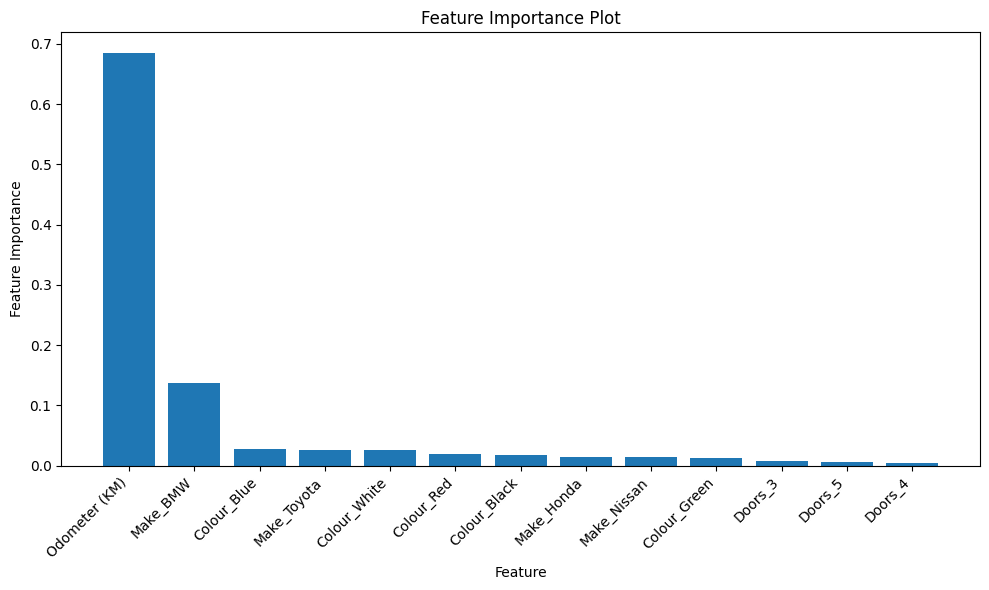

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(X_dum.shape[1]), feature_importance[sorted_indices])
plt.xticks(range(X_dum.shape[1]), np.array(feature_names)[sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.tight_layout()
plt.show()

# **Working with Missing Data**

In [ ]:
# Reading the Car Sales Data with Missing Information in it
car_sales_missing = pd.read_csv("/content/drive/MyDrive/Python/Datasets/car-sales-extended.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.head(20)

,Make,Colour,Odometer (KM),Doors,Price
980,Toyota,Blue,230314.0,4.0,6720.0
981,Toyota,White,129454.0,4.0,6446.0
982,Honda,White,238172.0,4.0,13273.0
983,Toyota,Red,NaN,4.0,14671.0
984,Nissan,Blue,157235.0,4.0,4196.0
985,NaN,Blue,216250.0,4.0,9691.0
986,Honda,White,71934.0,4.0,26882.0
987,Honda,White,215235.0,4.0,3825.0
988,Nissan,Black,248736.0,4.0,8358.0
989,Toyota,Red,41735.0,4.0,13928.0


In [ ]:
# Number of missing values in each variable
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
car_sales_missing.shape

(1000, 5)

In [ ]:
# Drop the rows with no labels
#car_sales_missing = car_sales_missing.dropna(subset=["Price"])
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
car_sales_missing.shape

(950, 5)

In [ ]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [ ]:
# Check missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [ ]:
X_train.isna().sum()

Make             35
Colour           38
Odometer (KM)    36
Doors            38
dtype: int64

In [ ]:
X_test.isna().sum()

Make             12
Colour            8
Odometer (KM)    12
Doors             9
dtype: int64

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
#cat_imputer = SimpleImputer(strategy="most_frequent") #mode
door_imputer = SimpleImputer(strategy="most_frequent")
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [ ]:
X_train.head()

,Make,Colour,Odometer (KM),Doors
986,Honda,White,71934.0,4.0
297,Toyota,Red,162665.0,4.0
566,Honda,White,42844.0,4.0
282,Honda,White,195829.0,4.0
109,Honda,Blue,219217.0,4.0


In [ ]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test,
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
# Now let's one hot encode the features with the same code as before
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.fit_transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [ ]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.25366332156443805

In [ ]:
# Check length of transformed data (filled and one-hot encoded) vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales_missing)

(950, 950)

**Note:**
* The 50 less values in the transformed data is because we dropped the rows (50 total) with missing values in the Price column.